1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  


In [1]:
import numpy as np
import numpy.random as random
random.seed(2011654)

#initial populations
Tl = 1000 # initial Tallium population
Pb = 0    # initial Lead population

dt  = 1        # time interval  [s]
tau = 3.052*60 # half-life time [s]

#time discretization considered
Dt = 32*60  # n min [s]
Nt = round(Dt/dt)

# population vector 1->Tl : 0->Pb
population = np.full(Tl,1,dtype=int)

# determines the evolution of a single atom
def is_Tl(d):
    if d==1:
        rand = random.rand()
        if(rand < 2**(-dt/tau)):
            return 1
        else:
            return 0
    else:
        return 0

#evolution function for the all population vector
update_population = np.vectorize( is_Tl )
    
# population evolution
Tl_history = np.empty(Nt,dtype=int)

Tl_history[0] = population.sum() #initial value
for i in range(1,Nt):
    population = update_population(population)
    Tl_history[i]=population.sum()
    
Pb_history = Tl-Tl_history
print(f"Tl -> {Tl_history}")
print(f"Pb -> {Pb_history}")

Tl -> [1000  997  995 ...    0    0    0]
Pb -> [   0    3    5 ... 1000 1000 1000]


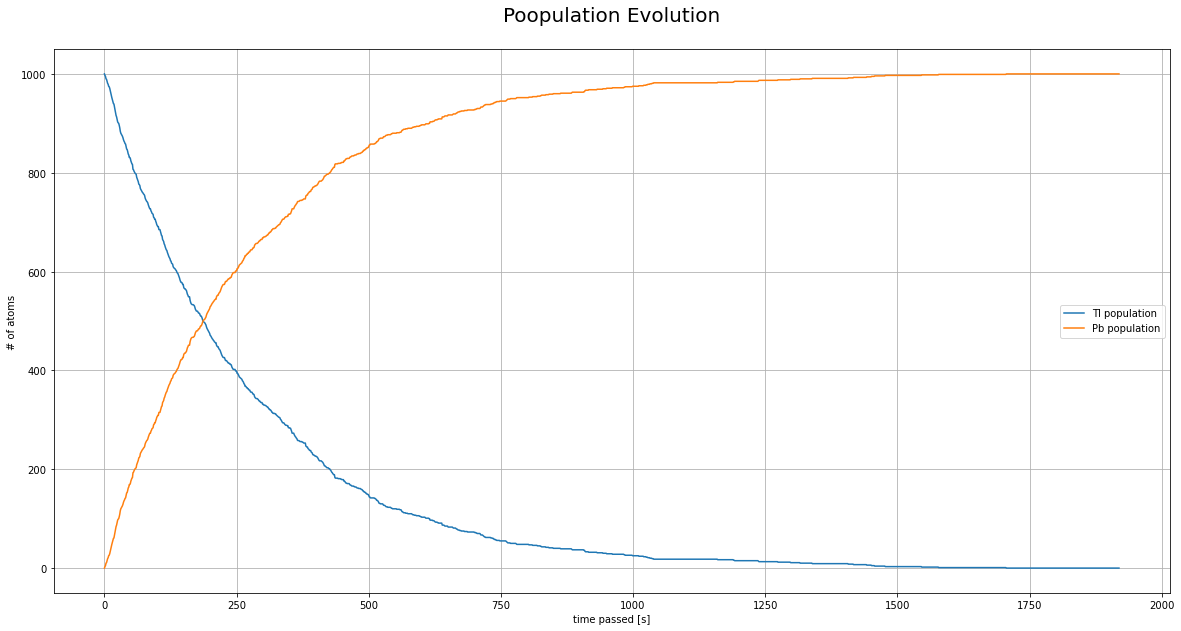

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=[20,10])

plt.plot(Tl_history,label="Tl population")
plt.plot(Pb_history,label="Pb population")
plt.xlabel("time passed [s]")
plt.ylabel("# of atoms")
plt.title("Poopulation Evolution\n",size=20)
plt.legend()
plt.grid(True)

plt.show()

* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

The target PDF is $p(t) := \left(\frac{\log(2)}{\tau}\right)2^{-\frac{t}{\tau}}$. This distribution represents the probability, for a givet atom, not to be decayed for times $<t$, or the probability for it to be decaied at times $>t$. This is also the probability desity of decayng at time $t$.

The inverse transfotmation requres to solve for $t$ as a function of $x(t)$ the following integral equation:

$$ \int_0^{x(t)} dt' = \int_0^t  \left(\frac{\log(2)}{\tau}\right) 2^{-\frac{t'}{\tau}} dt' $$

which becomes:

$$ x(t) = 1-2^{-\frac{t}{\tau}} $$

Solving for $t$ as a function of $x$, one obtains:

$$ t(x) = -\tau\log_2(1-x) $$

so that, the transformation function that turns a set of $x$ drawn from uniform $[0,1]$ distribution, into a set of $t$ drawn from the $p(t)$ distribution is exactly the aformentioned $t(x)$.

In [3]:
# decay times
N = 20000
t = -tau*np.log2(1-random.rand(N)) # drow samples from p(t) distribution
t = np.concatenate([[0],t]) # add 0 time for initial condition
t.sort()

In [4]:
#each decay changes the populations of 1 unit
Tl_population = np.arange(N,-1,-1)
Pb_population = N - Tl_population

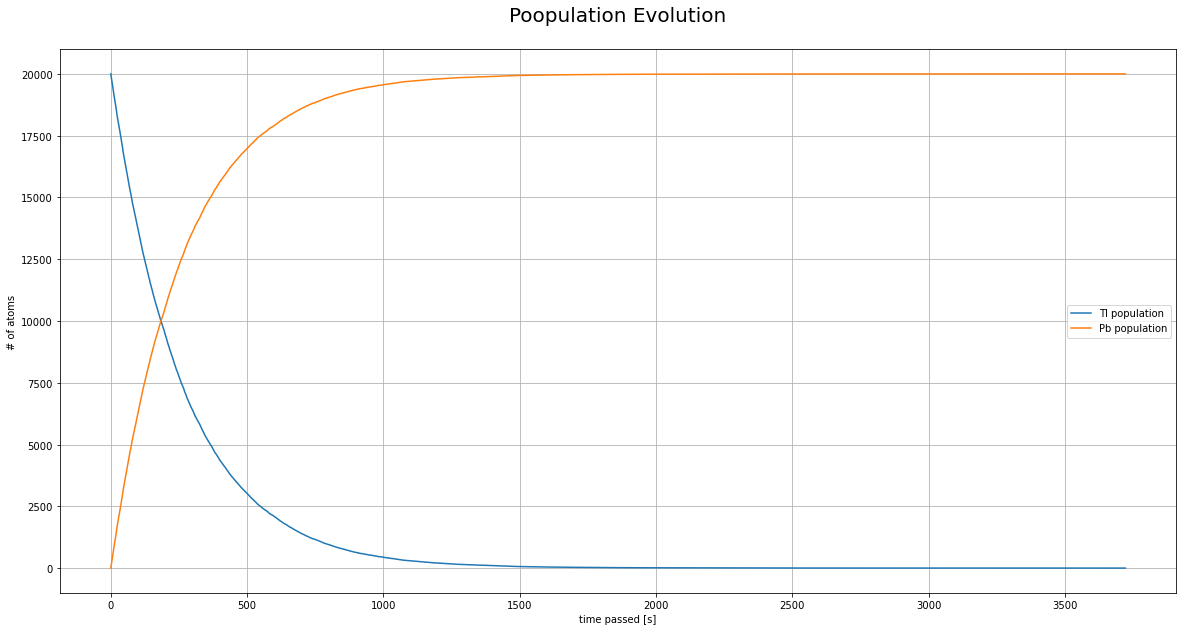

In [5]:
plt.figure(figsize=[20,10])

plt.plot(t,Tl_population,label="Tl population")
plt.plot(t,Pb_population,label="Pb population")
plt.xlabel("time passed [s]")
plt.ylabel("# of atoms")
plt.title("Poopulation Evolution\n",size=20)
plt.legend()
plt.grid(True)

plt.show()


Results are consistent with those obtained in the previous point.

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back", i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

#### **Solution:**
First I define appropriate reduced units:

The equation for the scattering angle can be rewritten as
$$
\tan{\frac{1}{2} \theta} = \frac{2 Z}{b^* E^*}
$$
Where $b^* = b/a_0 $ and $ E^* = E/\epsilon $, where $\epsilon\equiv \frac{\hbar^2}{m_ea_0^2}$ (Hartree atomic units).

Since the energy of the incoming beam is given to us in MeV the only constant we need to compute is the conversion factor between Mev and $\epsilon$.

In [6]:
# 1 MeV corresponds to # Hartree atomic units
epsilon_to_Mev = 27.211386245988e-6 # MeV
MeV_to_epsilon = 1/epsilon_to_Mev # epsilon

#incoming energy in epsilon units
E = 7.7*MeV_to_epsilon

# def of Z constant
Z = 79

We have now everithing we need to define the angle as a numeric function of the impact parameter.

In [7]:
# absolute value of scattering angle
def angle(b):
    return 2*np.abs(np.arctan(2*Z/(b*E)))

Now we consider the incoming beam. We assume it to be cilinrically simmetrical along the axis leading to the gold atom position. The distribution along the dimensions perpendicular to the axis of simmetry is given by a 2D gaussian distribution, of standard deviation $\sigma = a_0/100$, so that in reduced units it becomes $\sigma^* \equiv 1/100$.

In [8]:
sigma = 0.01

Since we are interested only in the overall magnitude of the scattering ancle, we do not need to consider the plane in which the scattering occurs. We are interested only in the magnitude of the scattering parameter, which is the distance of the incoming particle form the symmetry axis of the beam. We need to generate only the distribution of the radial coordinates of the particles.

In [9]:
#generate couples of x,y gaussian points --> make norm --> rescale with sigma
def beam_positions(N):
    return np.linalg.norm(random.randn(N,2),axis=1)*sigma

We can now create an array of scattering angles, and filter them in order to count the number fof back scattered ones.

In [16]:
N = int(1e6) # number of incoming particles

b = beam_positions(N)
theta = angle(b)

back_scattered_mask = theta>0.5*np.pi

# number fo back scattered incoming particles
N_back_scattered = len(theta[back_scattered_mask])
fraction_bs = N_back_scattered/N

# greater bs impact parameter
b_limit = b[back_scattered_mask].max()

print(f"number of back-scattered particles   --> {N_back_scattered} ")
print(f"fraction of back-scattered particles --> {fraction_bs:.4} ")
print(f"limit value for the impact parameter --> {b_limit:.4} a_0 ")

number of back-scattered particles   --> 1559 
fraction of back-scattered particles --> 0.001559 
limit value for the impact parameter --> 0.0005583 a_0 


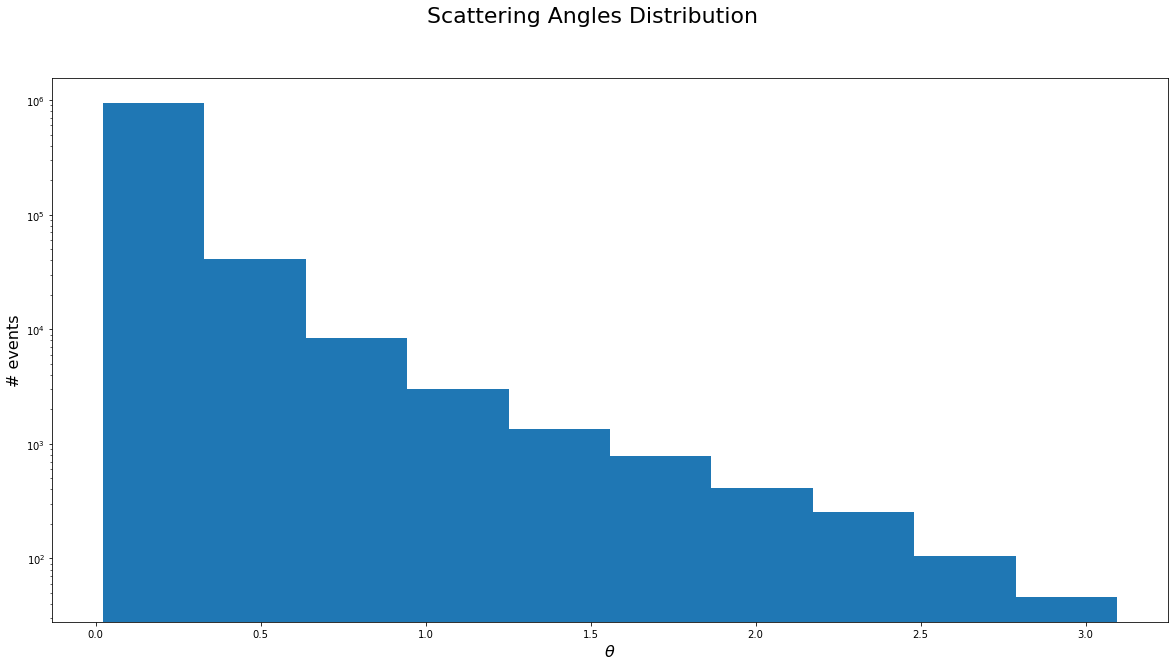

In [19]:
# plot distribution of scattering angles
plt.figure(figsize=[20,10])

plt.hist(theta)
plt.yscale("log")
plt.xlabel("$\\theta$",size=16)
plt.ylabel("# events",size=16)
plt.suptitle("Scattering Angles Distribution",size=22);

3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2\left({\frac{1}{x(2-x)}}\right)$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate

In [21]:
def f(x):
    return np.sin( 1/(x*(2-x)) )**2

The codomain of $f$ is limited to $0-1$ for the properties of the sine function.

I need to establish a domain over which to sample the uniform background distribution. The natural choice is: $ x\sim(0,2) $ and $ y\sim (0,1) $.

In [117]:
N = int(1e6)
x = random.rand(N)*2
y = random.rand(N)

The following function counts the number of times the generated imput is "under" the function's plot.

In [118]:
def isunderf(x,y):
    y = random.rand(len(x))*1
    return np.heaviside(f(x)-y,1)

An estimation of the integral can be computed exploiting proportionality between the areas and the probability of a point falling into it.

In [144]:
# rectangular area
A = 1*2

# probability of a point falling under f
u = isunderf(x,y)
Nu = u.sum()
p = Nu/N

# integral estimation
I = A*p
DI = 1/np.sqrt(Nu)

print(f"integral estimation --> {I} pm {DI:.3}")

integral estimation --> 1.451766 pm 0.00117


The error can be estimated analogously to the binning error in an histogram. Which is given by $1/\sqrt{n}$ where n is the number of counts in the bin.

In [168]:
# convergence of the value
uc = u.cumsum()
n  = np.arange(1,N+1)

II = (uc/n*A)

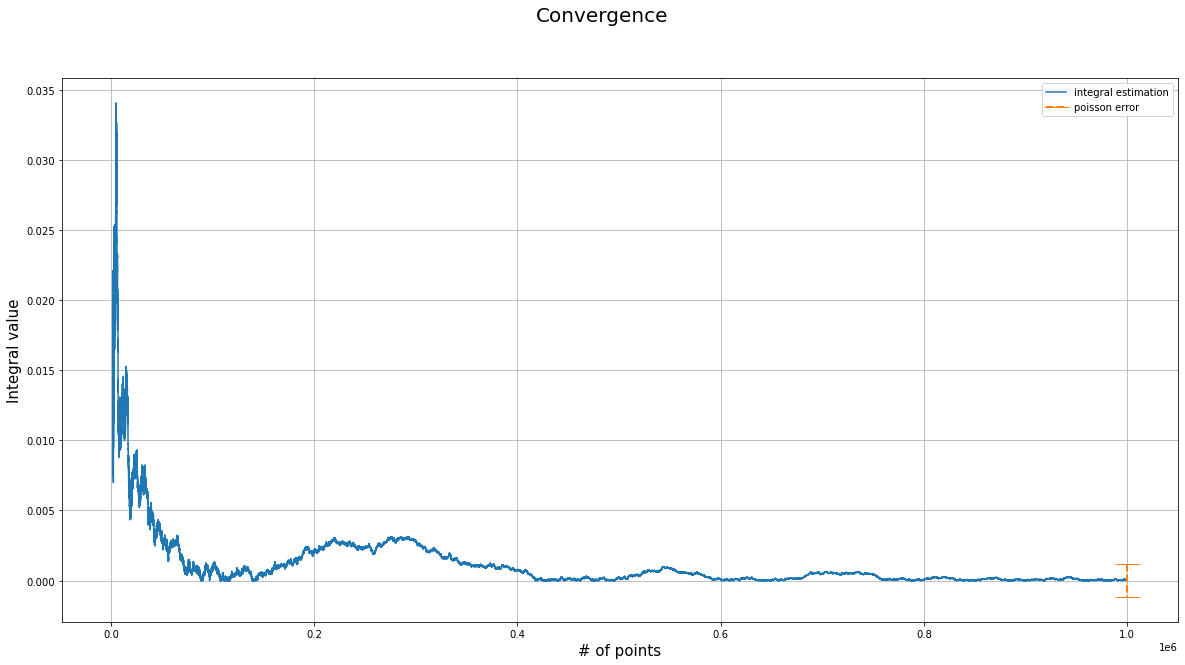

In [170]:
%matplotlib inline
start = int(N/600)
plt.figure(figsize=[20,10])
plt.plot(n[start:],II[start:],label="integral estimation")
plt.plot([n[-1],n[-1]],[II[-1]+DI,II[-1]-DI],linewidth=2,linestyle='--',marker='_',markersize=25,label="poisson error")
plt.xlabel("# of points",size=15)
plt.ylabel("Integral value",size=15)
plt.legend()
plt.suptitle("Convergence",size=20)
plt.grid(True)

* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

The mean value method consists in consider the function as defined over a uniform pdf and estimate its average over a finite sampling.

In [171]:
# domain sampling
N = int(1e6)
x = random.rand(N)*2

# values of f over the sampling
ff = f(x)

# mean value estimation
mean_f = ff.sum()/N

# domain measure
A = 2

# integral estimation
I = A*mean_f
DI = np.sqrt(  ( (ff**2).mean() - ff.mean()**2 )/(N-1)   )

print(f"integral estimation --> {I} pm {DI:.3}")

integral estimation --> 1.4515250242604496 pm 0.000264


The error can be estimated as the error over a mean value, arising from central limit theorem:
$$ \sigma_M = \sqrt{ \frac{\sigma^2}{N-1} } = \sqrt{ \frac{<f^2> - <f>^2}{N-1} } $$

In [175]:
# convergence of the value 
n  = np.arange(1,N+1)
mean_fcum = ff.cumsum()/n

II = A*mean_fcum

In [173]:
II = np.abs(II-II[-1])

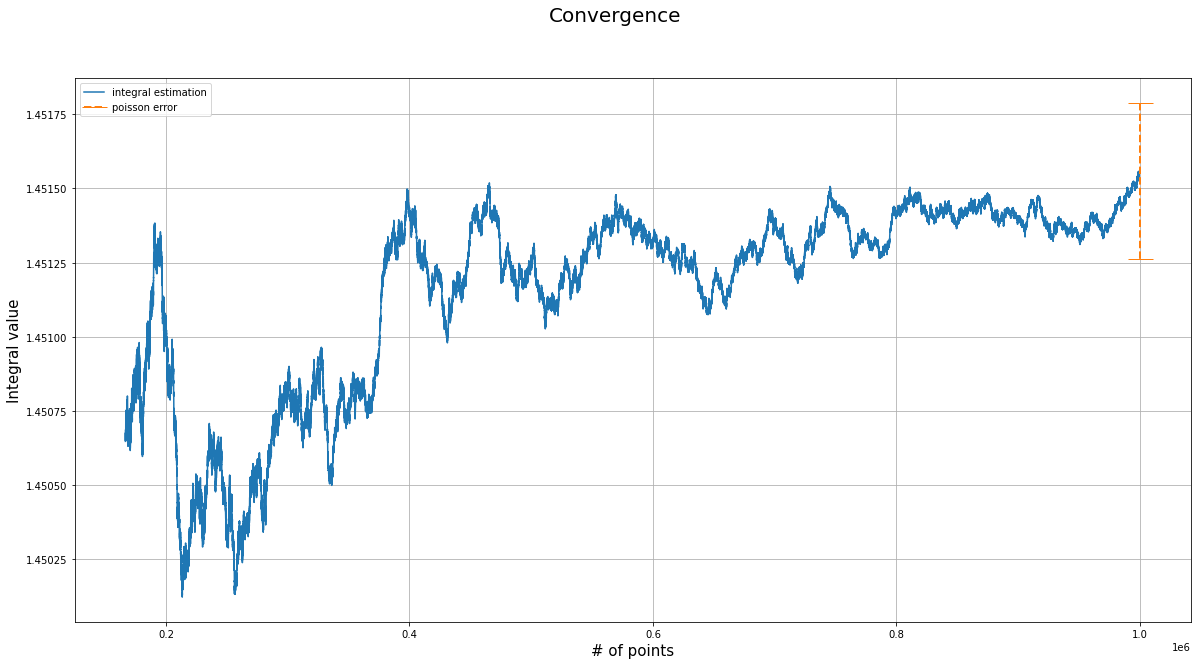

In [177]:
%matplotlib inline
start = int(N/6)
plt.figure(figsize=[20,10])
plt.plot(n[start:],II[start:],label="integral estimation")
plt.plot([n[-1],n[-1]],[II[-1]+DI,II[-1]-DI],linewidth=2,linestyle='--',marker='_',markersize=25,label="poisson error")
plt.xlabel("# of points",size=15)
plt.ylabel("Integral value",size=15)
plt.legend()
plt.suptitle("Convergence",size=20)
plt.grid(True)

4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84